In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Questão 1

## Método dos Mínimos Quadrados

O Método dos Mínimos Quadrados tem como objetivo aproximar uma função qualquer (conhecida ou não) por uma combinação de funções conhecidas. Note que o Método dos Mínimos Quadrados se difere da Interpolação pois, dado os valores amostrados, a função obtida com o Método dos Mínimos Quadrados não necessariamente precisa passar em todos os pontos, ocorre um *ajuste*.  
O Método dos Mínimos Quadrados possue o caso contínuo e discreto. O caso contínuo é quando a função $f(x)$ é conhecida. O caso discreto é quando a $f(x)$ é dada amostrada, ou seja, é conhecido apenas $(n+1)$ pontos. Como a questão fornece os valores de $f(x)$ amostrados, será aplicado o caso do Método dos Mínimos Quadrados discreto:  

Dada uma função $f(x)$ amostrada, ou seja, é conhecida apenas nos $(n+1)$ pares de pontos $(x_0, y_0), (x_1, y_1), ..., (x_n, y_n)$, onde $y_i = f(x_i), i = 0, ..., n$ com os $(n+1)$ pontos $x_0, x_1, ..., x_n$ distintos.  
Desejamos aproximar a função $f$ por um polinômio $P_m \in \mathcal{P_m}$, isto é: $f(x) \approx \alpha_0 + \alpha_1x + ... + \alpha_mx^m = P_m(x)$ com m < n, tal que $Q = min ||f-P_m||^2$.  
Para isso, basta resolver o sistema de equações:  
$
\begin{bmatrix}
\left< u_0, u_0\right> & \left< u_0, u_1\right> & ... & \left< u_0, u_m\right>
\\ ... & ... & ... & ... \\
\left< u_m, u_0\right> & \left< u_m, u_1\right> & ... & \left< u_m, u_m\right>
\end{bmatrix}
=
\begin{bmatrix}
\alpha_0 \\ ... \\ \alpha_m
\end{bmatrix}
=
\begin{bmatrix}
\left< u_0, y\right> \\ ... \\ \left< u_m, y\right>
\end{bmatrix}
$  
Esse sistema é reescrito em formato matricial para calcular computacionalmente. Além disso, o formato matricial pode ser resolvido utilizando Decomposição QR, pois, devido a estrutura do formato matricial, o cálculo é simplificado. 

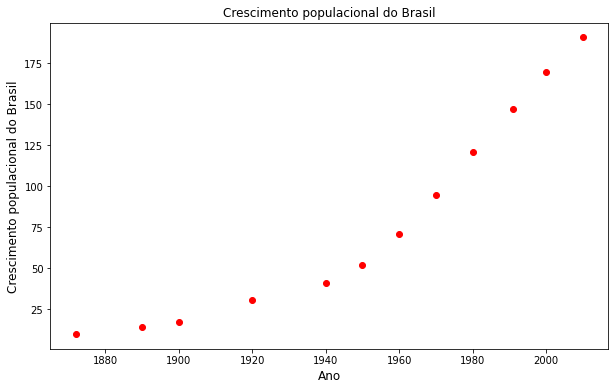

In [8]:
x = np.array([1872, 1890, 1900, 1920, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2010])
y = np.array([9.9, 14.3, 17.4, 30.6, 41.2, 51.9, 70.9, 94.5, 121.1, 146.9, 169.5, 190.7])

plt.figure(figsize=(10,6),facecolor='white')
plt.xlabel('Ano', fontsize='large') 
plt.ylabel('Crescimento populacional do Brasil', fontsize='large') 
plt.plot(x, y, 'ro')
plt.title('Crescimento populacional do Brasil')
plt.show()

In [9]:
 # Calculando o Método dos Minimos Quadrados utilizando a forma matricial com Decomposição QR
 def mmq_qr(x,y,k):
    X = np.vander(x,k);
    (Q,R) = np.linalg.qr(X)
    b = np.transpose(Q).dot(y);
    a = np.linalg.solve(R,b);
    return a

Ajustando, no sentindo dos mínimos quadrados, com uma reta (polinômio de primeiro grau):

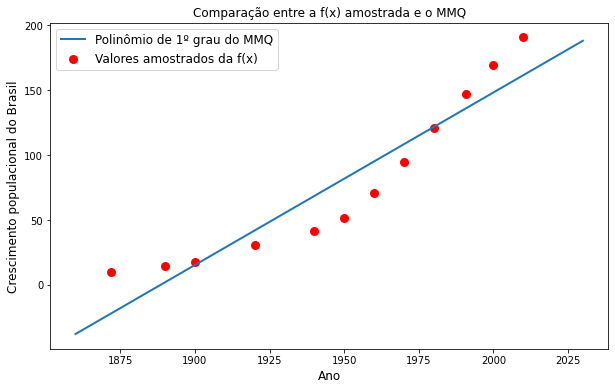

In [10]:
x = np.array([1872, 1890, 1900, 1920, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2010])
y = np.array([9.9, 14.3, 17.4, 30.6, 41.2, 51.9, 70.9, 94.5, 121.1, 146.9, 169.5, 190.7])

# Para o grau 1, é necessário uma matriz de Vander 2x2
alphas_mmq_polinomio_primeiro_grau = mmq_qr(x, y, 2) 
# Criando o polinômio de 1º grau
polinomio_primeiro_grau = lambda x: alphas_mmq_polinomio_primeiro_grau[1] + alphas_mmq_polinomio_primeiro_grau[0]*x;

# Plotar os resultados
x_continuo = np.linspace(1860, 2030, num=40, endpoint=True)
plt.figure(figsize=(10,6), facecolor='white')
plt.title('Comparação entre a f(x) amostrada e o MMQ') 
plt.xlabel('Ano', fontsize='large') 
plt.ylabel('Crescimento populacional do Brasil', fontsize='large') 
plt.scatter(x, y, label = 'Valores amostrados da f(x)',linewidth = 3, color='red')
plt.plot(x_continuo, polinomio_primeiro_grau(x_continuo), label = 'Polinômio de 1º grau do MMQ', linewidth = 2)
plt.legend(fontsize='large') 
plt.show()

Ajustando, no sentindo dos mínimos quadrados, com uma parábola (polinômio de segundo grau):

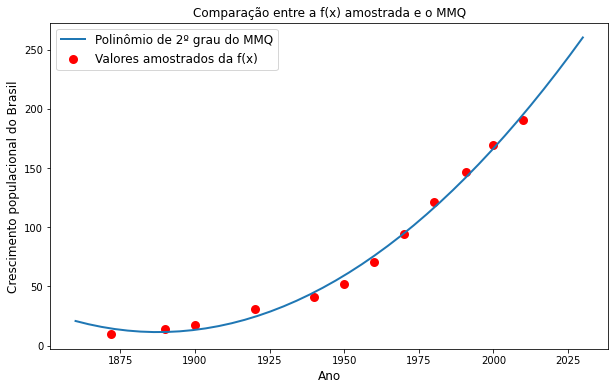

In [11]:
x = np.array([1872, 1890, 1900, 1920, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2010])
y = np.array([9.9, 14.3, 17.4, 30.6, 41.2, 51.9, 70.9, 94.5, 121.1, 146.9, 169.5, 190.7])

# Para o grau 2, é necessário uma matriz de Vander 3x3
alphas_mmq_polinomio_segundo_grau = mmq_qr(x, y, 3) 
# Criando o polinômio de 2º grau
polinomio_segundo_grau = lambda x: alphas_mmq_polinomio_segundo_grau[2] + alphas_mmq_polinomio_segundo_grau[1]*x + alphas_mmq_polinomio_segundo_grau[0]*x**2;

# Plotar os resultados
x_continuo = np.linspace(1860, 2030, num=40, endpoint=True)
plt.figure(figsize=(10,6), facecolor='white')
plt.title('Comparação entre a f(x) amostrada e o MMQ') 
plt.xlabel('Ano', fontsize='large') 
plt.ylabel('Crescimento populacional do Brasil', fontsize='large') 
plt.scatter(x, y, label = 'Valores amostrados da f(x)',linewidth = 3, color='red')
plt.plot(x_continuo, polinomio_segundo_grau(x_continuo), label = 'Polinômio de 2º grau do MMQ', linewidth = 2)
plt.legend(fontsize='large') 
plt.show()

## 1a)

In [12]:
# Calculo do erro do MMC Discreto
def erro(y, yp):
  return np.sum(np.power(y-yp, 2))

x = np.array([1872, 1890, 1900, 1920, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2010])
y = np.array([9.9, 14.3, 17.4, 30.6, 41.2, 51.9, 70.9, 94.5, 121.1, 146.9, 169.5, 190.7])

alphas_mmq_polinomio_primeiro_grau = mmq_qr(x, y, 2) 
polinomio_primeiro_grau = lambda x: alphas_mmq_polinomio_primeiro_grau[1] + alphas_mmq_polinomio_primeiro_grau[0]*x;
y_polinomio_primeiro_grau = np.array([polinomio_primeiro_grau(1872), polinomio_primeiro_grau(1890), 
                                      polinomio_primeiro_grau(1900), polinomio_primeiro_grau(1920), 
                                      polinomio_primeiro_grau(1940), polinomio_primeiro_grau(1950),
                                      polinomio_primeiro_grau(1960), polinomio_primeiro_grau(1970),
                                      polinomio_primeiro_grau(1980), polinomio_primeiro_grau(1991),
                                      polinomio_primeiro_grau(2000), polinomio_primeiro_grau(2010)])
print("Erro da reta: ", erro(y, y_polinomio_primeiro_grau))

alphas_mmq_polinomio_segundo_grau = mmq_qr(x, y, 3) 
polinomio_segundo_grau = lambda x: alphas_mmq_polinomio_segundo_grau[2] + alphas_mmq_polinomio_segundo_grau[1]*x + alphas_mmq_polinomio_segundo_grau[0]*x**2;
y_polinomio_segundo_grau = np.array([polinomio_segundo_grau(1872), polinomio_segundo_grau(1890), 
                                      polinomio_segundo_grau(1900), polinomio_segundo_grau(1920), 
                                      polinomio_segundo_grau(1940), polinomio_segundo_grau(1950),
                                      polinomio_segundo_grau(1960), polinomio_segundo_grau(1970),
                                      polinomio_segundo_grau(1980), polinomio_segundo_grau(1991),
                                      polinomio_segundo_grau(2000), polinomio_segundo_grau(2010)])
print('Erro da parábola: ', erro(y, y_polinomio_segundo_grau))

Erro da reta:  5123.651934007483
Erro da parábola:  249.30911391428845


Logo, com base no erro da aproximação, a parábola é melhor para estimar a população atual do país.

## 1b)
Com base na questão 1a), temos que a melhor estimativa da população atual do país é dada pelo polinômio de segundo grau: $P_2(x) = 43726.26570752424 -46.31708966298236 * x + 0.012268578546957837 * x^2$.  

In [13]:
alphas_mmq_polinomio_segundo_grau = mmq_qr(x, y, 3) 
polinomio_segundo_grau = lambda x: alphas_mmq_polinomio_segundo_grau[2] + alphas_mmq_polinomio_segundo_grau[1]*x + alphas_mmq_polinomio_segundo_grau[0]*x**2;
print(polinomio_segundo_grau(2021))

229.71272755190876


Logo, a população estimada do Brasil em 2021 é dado por $P_2(2021) = 229.71272755190876$ (em milhões).

# Questão 2

In [14]:
# Metodo de Runge-Kutta de ordem 4 
# Cálculo do valor das equações ao longo do "tempo"
def rk4_sys(x,h,F,Y0):
    n = len(x);
    m = len(Y0);
    Y = np.zeros((m,n));
    Y[:,0] = Y0;

    for i in np.arange(1,n):
        k1 = F(x[i-1],Y[:,i-1]);
        k2 = F(x[i-1]+0.5*h,Y[:,i-1]+0.5*h*k1);
        k3 = F(x[i-1]+0.5*h,Y[:,i-1]+0.5*h*k2);
        k4 = F(x[i-1]+h,Y[:,i-1]+h*k3);

        Y[:,i] = Y[:,i-1] + (h/6)*(k1+2*(k2+k3)+k4);

    return Y;

## 2a)

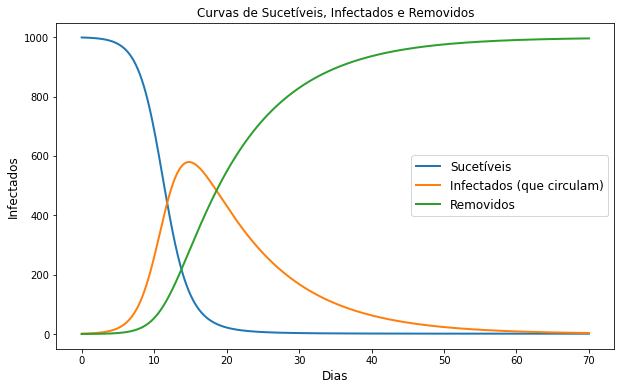

O pico de infectados ocorreu no dia 14.813 com um número total de infectados de 579.2986198319211


In [15]:
# Taxa de recuperação
a = 0.1;
# Taxa de contágio
b = 0.0007;  

# Definindo o sistema de EDOs
F = lambda x,Y: np.array([(-b)*Y[0]*Y[1], ((b*Y[0]*Y[1]) - a*Y[1]), a*Y[1]]);

# Valores iniciais
Y0 = np.array([999, 1, 0])
# Espaçamento
h = 0.001;
 
n = int((70-0)/h);
x = np.linspace(0, 70, n+1, endpoint=True);

Y_rk4 = rk4_sys(x, h, F, Y0);

plt.figure(figsize=(10,6), facecolor='white')
plt.plot(x, Y_rk4[0,:], label = 'Sucetíveis', linewidth = 2)
plt.plot(x, Y_rk4[1,:], label = 'Infectados (que circulam)', linewidth = 2)
plt.plot(x, Y_rk4[2,:], label = 'Removidos', linewidth = 2)
plt.xlabel('Dias', fontsize='large') 
plt.ylabel('Infectados', fontsize='large') 
plt.title('Curvas de Sucetíveis, Infectados e Removidos') 
plt.legend(fontsize='large') 
plt.show()

# Obtendo o indice do elemento de maior tamanho
dia_maximo_infectados = np.argmax(Y_rk4[1,:]) * h
# Obtendo o elemento de maior tamanho
numero_maximo_infectados = np.max(Y_rk4[1,:])

print("O pico de infectados ocorreu no dia", dia_maximo_infectados, "com um número total de infectados de", numero_maximo_infectados)

## 2b)

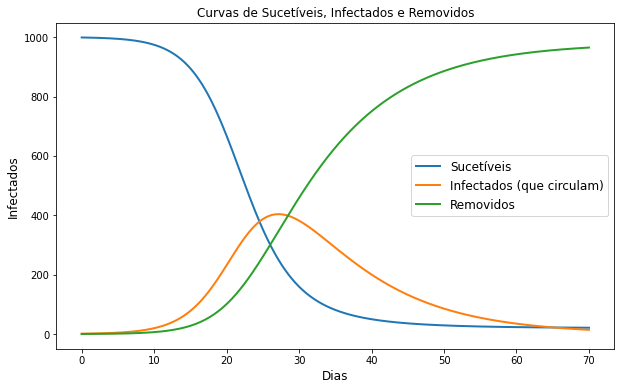

O pico de infectados ocorreu no dia 27.156 com um número total de infectados de 403.676534661761


In [16]:
# Taxa de recuperação
a = 0.1;
# Taxa de contágio
b = 0.0004;  

# Definindo o sistema de EDOs
F = lambda x,Y: np.array([(-b)*Y[0]*Y[1], ((b*Y[0]*Y[1]) - a*Y[1]), a*Y[1]]);

# Valores iniciais
Y0 = np.array([999, 1, 0])
# Espaçamento
h = 0.001;

n = int((70-0)/h);
x = np.linspace(0, 70, n+1, endpoint=True);

Y_rk4 = rk4_sys(x, h, F, Y0);

plt.figure(figsize=(10,6), facecolor='white')
plt.plot(x,Y_rk4[0,:], label = 'Sucetíveis', linewidth = 2)
plt.plot(x,Y_rk4[1,:], label = 'Infectados (que circulam)', linewidth = 2)
plt.plot(x,Y_rk4[2,:], label = 'Removidos', linewidth = 2)
plt.xlabel('Dias', fontsize='large') 
plt.ylabel('Infectados', fontsize='large') 
plt.title('Curvas de Sucetíveis, Infectados e Removidos') 
plt.legend(fontsize='large') 
plt.show()

# Obtendo o indice do elemento de maior tamanho
dia_maximo_infectados = np.argmax(Y_rk4[1,:]) * h
# Obtendo o elemento de maior tamanho
numero_maximo_infectados = np.max(Y_rk4[1,:])

print("O pico de infectados ocorreu no dia", dia_maximo_infectados, "com um número total de infectados de", numero_maximo_infectados)

## Comparação

Com $b = 0.0007$, no dia de pico, o número máximo de infectados foi $579.2986198319211$.    

Com $b = 0.0004$, no dia de pico, o número máximo de infectados foi $403.676534661761$

Logo, com medidas de isolamento intensificadas, houve uma diminuição de infectados durante o pico. 

# Questão 3

## 3a)

## Zero de Funções
Seja $f \in C$, queremos encontrar soluções para a equação não-linear: $f(x) = 0$. Uma solução da equação, chamada de raiz ou zero, será denotada por $\alpha$.  
Equações não-lineares possuem um número indeterminado de zeros, e como nem sempre é possível obter as raízes de forma analítica, se faz necessário o uso de métodos numéricos iterativos:

Dado um chute inicial $x_0$, os métodos iterativos geram uma sequência de iterados {$x_0, x_1, x_2, ...$} que talvez convirjam para uma raiz da função.  
Para encontrar os zeros de funções através de métodos iterativos, é necessário um intervalo $[a, b]$ que contenha uma raiz. Tal intervalo pode ser obtido através do Teorema do Valor Intermediário (TVI) ou via análise do gráfico da função.  
Note que, em geral, um método iterativo não encontra uma solução exata, mas sim uma solução (arbitrariamente) próxima a exata. Por isso, para verificar a (quase) convergência, pode ser utilizados:
- Número máximo de iterações;
- Erro absoluto;
- Erro relativo;
- Teste do resíduo.

Os métodos iterativos são: Método da Bisseção, Método de Newton e Método das Secantes. O Método de Newton e o Método das Secantes são Métodos de Ponto Fixo. 

### Método da Bissecção
No Método da Bissecção, dado o intervalo $[a, b]$ que contenha uma raiz, este intervalo é dividido ao meio obtendo o valor k. Um dos extremos (superior ou inferior) é substituido pelo valor k de forma que a propriedade do TVI seja mantida. Tal processo é realizado de forma recursiva.  

Possui as seguintes caracteristicas:
- Simples e fácil de implementar;
- Seguro e robusto;
- Convergência garantida;
- Requerer apenas que $f \in C([a, b])$;
- Lento e difícil de generalizar para sistemas de equações.

### Método do Ponto Fixo
No Método do Ponto Fixo, o problema inicial $f(x) = 0$ é reescrito como $x = g(x)$. Assim, é procurado um ponto fixo, ou seja, um ponto $\alpha$ que satisfaça $g(\alpha) = \alpha$.   

$x = g(x)$ é equivalente a $f(x) = 0$ pois é possível escrever como $g(x) = x - f(x)$.   
Quando isto ocorre, ao aplicar $\alpha$ em $g(x)$, temos:  
$g(x) = x - f(x)$    
$g(\alpha) = x - f(\alpha)$  
$g(\alpha) = x - 0$  
$g(\alpha) = \alpha$


Logo, dada uma função real $f(x)$. É escolhido uma função $g(x)$ tal que $f(x) = 0 \leftrightarrow x = g(x)$. Depois:
- Com um chute inicial $x_0$;
- Para $k = 0, 1, 2, ....$, faça $x_{k+1} = g(x_k)$, até que $x_{k+1}$ satisfaça algum critério de parada.


O Método de Newton é um Método do Ponto Fixo que define $g(x) = x - \frac{f(x)}{f'(x)}$.

#### Método de Newton
Seja $f(x)$ função que buscamos uma raiz $\alpha$, diferenciável.  
Note que, na prática, a derivada $f'(x)$ deve ser barata de ser calculada, isso em comparação com $f(x)$.  

Então, o Método de Newton é definido através do seguinte processo iterativo:  

$x_{k+1} = x_k - \frac{f(x_k)}{f'(x_k)}$, $k = 0, 1...$

No Método de Newton, a escolha do chute inicial $x_0$ é importante. Dependendo do chute inicial escolhido, pode ocorrer de, geometricamente, as tangentes não convergirem para a raiz. 

Além disso, o Método de Newton possui uma convergência quadrática, ou seja, a cada iteração, a precisão melhora em pelo menos o dobro de casas decimais da iteração anterior.

Possui as seguintes caracteristicas:
- Simples e fácil de implementar;
- Generalização para sistemas de equações é trivial;
- Convergência rápida;
- Requer o cálculo de $f'(x)$ que pode ser computacionalmente caro;
- A função $f(x)$ pode não ser diferenciável.

#### Método das Secantes
O Método das Secantes é uma alternativa ao Método de Newton. Visa solucionar o problema da $f'(x)$ ser computacionalmente cara. Para isso, aproxima a derivada por diferenças finitas:

$f'(x_k) \approx \frac{f(x_k)-f(x_{k-1})}{x_k - x_{k-1}}$

Possui as seguintes caracteristicas:
- Não requer o cálculo de derivadas;
- Precisa de dois chutes iniciais $x_0$ e $x_1$;
- A convergência não é tão rápida quanto o Método de Newton.

Com isto, o Método das Secantes é definido através do seguinte processo iterativo:

$x_{k+1} = x_k - f(x_k) \frac{x_k - x_{k-1}}{f(x_k)-f(x_{k-1})}$, $k = 1, 2...$

#### Ordem de Convergência
Com base no Teorema de Ostrowski, é possível escrever o Teorema de Convergência do Método de Newton e Método da Secante:

- Teorema de Convergência do Método de Newton:  
Se $f \in C^2([a,b])$ e existir $\alpha \in [a,b]$, tal que $f(\alpha) = 0$ e $f'(\alpha) \neq 0$, então, existe $\delta > 0$ tal que a sequência {$x_k$} gerapada pelo Método de Newton converge **quadraticamente** para $\alpha$, $\forall x_0 \in (\alpha-\delta, \alpha+\delta)$.   
Ou seja, existe uma vizinhança da raiz que se o chute inicial for retirado desta vizinhança, é garantido a convergência.

- Teorema de Convergência do Método da Secante:  
Se $f \in C^2([a,b])$ e existir $\alpha \in [a,b]$, tal que $f(\alpha) = 0$ e $f'(\alpha) \neq 0$, então, existe $\delta > 0$ tal que a sequência {$x_k$} gerapada pelo Método da Secante converge **superlinearmente** para $\alpha$, $\forall x_0 \in (\alpha-\delta, \alpha+\delta)$.   
Ou seja, existe uma vizinhança da raiz que se o chute inicial for retirado desta vizinhança, é garantido a convergência.





In [17]:
# Método da Bisseção
def bissecao(func, a, b, x0, tol, kmax, flag_parada):
    x = x0; erro = np.inf; k = 0;

    while(erro > tol and k < kmax):
        k = k + 1;
        if(func(a)*func(x) < 0):
            b = x;
        else:
            a = x;
        
        x0 = x;
        x = (a+b)/2;
        
        # Cálculo do erro vai depender do critério de parada escolhido
        if(flag_parada == 0):
            erro = abs(x-x0);
        elif(flag_parada == 1):
            erro = abs(x-x0)/abs(x);
        else:
            erro = abs(func(x));
            
    return x, k, erro

Queremos o ponto $x'$ no qual as função $p(x)$ e $q(x)$ se encontram. Com isto, podemos aplicar $x'$ em $p(x)$ ou $q(x)$ e encontrar a altura que ocorre o impacto. Por isso, vamos igualar $p(x)$ e $q(x)$ e encontrar o zero da função ($x'$) com o método da bissecção:

$
p(x) = q(x) \\
-x^4 + 7.7x^3 - 18x^2 + 13.6x = -x^2 + 5x + 0.75 \\
-x^4 + 7.7x^3 - 18x^2 + x^2 + 13.6x - 5x - 0.75 = 0 \\
-x^4 + 7.7x^3 - 17x^2 + 8.6x - 0.75 = 0
$

Como há duas soluções e queremos o ponto de impacto, podemos utilizar o intervalo $[3, 3.4]$.

In [18]:
r = lambda x: -x**4 + 7.7*x**3 - 17*x**2 + 8.6*x  - 0.75;
a = 3; b = 3.4; tolerancia = 0.001; x0 = (a+b)/2;
# Utilizando a norma para o cálculo do erro se aproximar do cálculo do erro do Método de Netwon Para Sistemas
(x_linha, numero_de_iteracoes, erro_bisseccao) = bissecao(r, a, b, x0, tolerancia, 5, 2) 
print("O x' onde ocorre o impacto é:", x_linha)
p = lambda x: -x**4 + 7.7*x**3 - 18*x**2 + 13.6*x; 
print("Logo, a altura que ocorre o impacto é:", p(x_linha))
print("Nota: Para obter o x, foram necessárias", numero_de_iteracoes, "iterações e o erro foi de", erro_bisseccao)

O x' onde ocorre o impacto é: 3.16875
Logo, a altura que ocorre o impacto é: 6.5297640609741165
Nota: Para obter o x, foram necessárias 5 iterações e o erro foi de 0.02300937652586299


## 3b)

## Sistemas Não-Lineares

Desejamos resolver um sistema de $n$ equações não-lineares e $n$ incógnitas:

$
\begin{cases}
f_1(x_1, x_2, ..., x_n) = 0 \\
f_2(x_1, x_2, ..., x_n) = 0 \\
... \\
f_n(x_1, x_2, ..., x_n) = 0 
\end{cases}
$  

Na forma vetorial:
$f(x) = \vec0$   
com $f(x) = (f_1(x), f_2(x), ..., f_n(x))^T$ e $x = (x_1, x_2, ..., x_n)^T$.

Para isso, utilizamos o Método de Newton para Sistemas Não-Lineares:  
Note que utilizaremos a Matriz Jacobiana $J$ (matriz formada pelas derivadas parciais).  
- Dado um chute inicial $x_0$ (um vetor), vamos gerar uma sequência {$x_1, ..., x_k, ...$} onde $x_{k+1}$ é obtido por $x_k$ linearizando $f(x) = \vec0$;
- Seja $\alpha = x_k + v$, então para $v$ suficientemente pequeno temos: $\vec0 = f(\alpha) = f(x_k + v) \approx f(x_k) + J(x_k)v$;
- Aproxime $\alpha$ por $x_{k+1} = x_k + v_k$ onde $v_k$ é solução do sistema linear $J(x_k)v_k = -f(x_k)$;  

O Método de Netwon é um MPF, logo $x_{k+1} = g(x_k) = x_k - J^{-1}(x_k)f(x_k)$.

In [19]:
# Método de Netwon Para Sistemas
def newton_sis(F, Jac, x, tol, kmax):
    erro = np.inf; k = 0;

    while(erro > tol and k < kmax):
        k = k+1;
        v = np.linalg.solve(Jac(x),F(x));
        x = x-v;
        erro = np.linalg.norm(v);

    return x, k

Como queremos o ponto de impacto, podemos definir o sistema de equações lineares como:
$
\begin{cases}
p(x) - y = 0 \\
q(x) - y = 0 
\end{cases}
$  
Desta forma, é (0, 0) quando a distância entre o ponto (x, y) e as duas curvas é zero.

In [20]:
p = lambda x: -x[0]**4 + 7.7*x[0]**3 - 18*x[0]**2 + 13.6*x[0] - x[1]; 
q = lambda x: -x[0]**2 + 5*x[0] + 0.75 - x[1];
F = lambda x: np.array([p(x), q(x)])
 
# Jacobiano
jac11 = lambda x: -4*x[0]**3 + 23.1*x[0]**2 - 36*x[0] + 13.6; 
jac12 = lambda x: -1;
jac21 = lambda x: -2*x[0] + 5;
jac22 = lambda x: -1;
J = lambda x: np.array([[jac11(x),jac12(x)],[jac21(x),jac22(x)]])

# Chute inicial
x0 = [3, 7]

tolerancia = 0.001; kmax = 5;
(x, numero_de_iteracoes) = newton_sis(F, J, x0, tolerancia, kmax)

r = lambda x: -x**4 + 7.7*x**3 - 17*x**2 + 8.6*x  - 0.75;
erro_netwon_sistema = abs(r(x[0]))

print("Logo, o ponto onde ocorre o impacto é ", x[0], "com altura", x[1])
print("Nota: Para obter o x, foram necessárias", numero_de_iteracoes, "iterações e o erro foi de", erro_netwon_sistema)

Logo, o ponto onde ocorre o impacto é  3.1729162983206463 com altura 6.547183663998295
Nota: Para obter o x, foram necessárias 3 iterações e o erro foi de 3.510755774982499e-08


## Comparação

In [21]:
print("Erro do Método da Bissecção:", erro_bisseccao)
print("Erro do Método de Newton Para Sistemas:", erro_netwon_sistema)

Erro do Método da Bissecção: 0.02300937652586299
Erro do Método de Newton Para Sistemas: 3.510755774982499e-08


Logo, o Método de Newton Para Sistemas obteve uma melhor aproximação para o resultado.